In [39]:
# Import Modules
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from math import log10, floor

plt.style.use("seaborn") # Pretty graphs

In [40]:
# Round to specified number of significant digits
def round_sig(x, sig=2):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [41]:
# Load data from file
data = np.loadtxt("../data/g_radii_nmin100_nmax5000.csv", delimiter = ",")

data

n = data[:, 0]
t = data[:, 1] # adjust others as necessary
r = data[:, 2]
seeds = data[:, 3]
d_max = data[:, 4]


## Plot Raw Data

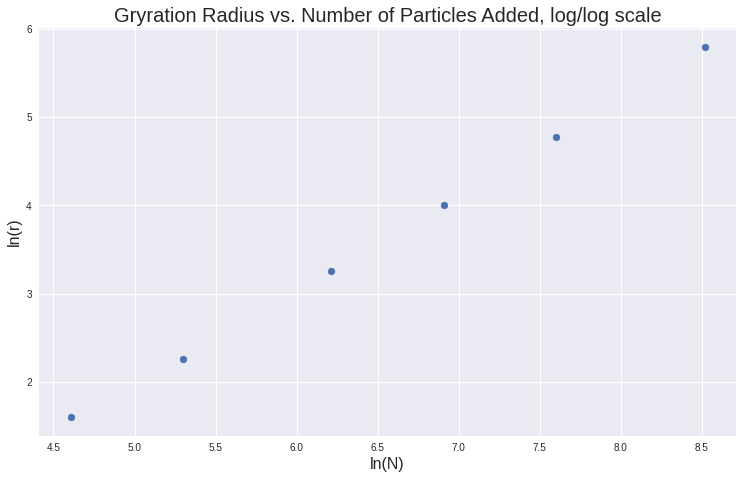

In [42]:
# Create figure
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = plt.subplot(111)

plt.title("Gryration Radius vs. Number of Particles Added, log/log scale", fontsize=20)
plt.xlabel("ln(N)", fontsize=16)
plt.ylabel("ln(r)", fontsize=16)

n_plot = np.log(n)
r_plot = np.log(r)

plt.scatter(n_plot, r_plot)

plt.show()

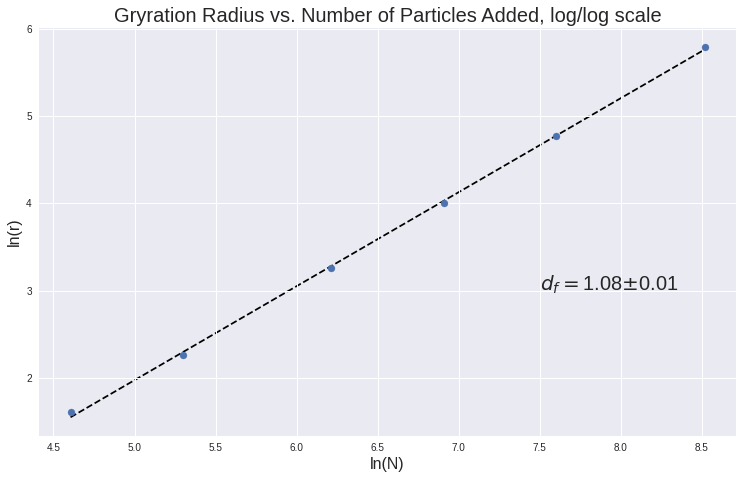

In [43]:
# Perform OLS Regression

n_plot_model = sm.add_constant(n_plot)

model = sm.OLS(r_plot, n_plot_model)

results = model.fit()

params = results.params
bse = results.bse

r_plot_fit = params[1] * n_plot + params[0]

# Create figure
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = plt.subplot(111)

plt.title("Gryration Radius vs. Number of Particles Added, log/log scale", fontsize=20)
plt.xlabel("ln(N)", fontsize=16)
plt.ylabel("ln(r)", fontsize=16)

n_plot = np.log(n)
r_plot = np.log(r)

plt.scatter(n_plot, r_plot)
plt.plot(n_plot, r_plot_fit, linestyle = "--", color = "black", zorder = 0)

# Extract gradient of graph and associated uncertainty

nu = params[1]

nu_err = round_sig(results.bse[1], 1)

# Find number of decimal places that the error is to 1sf
nu_dec = str(nu_err)[::-1].find('.')

# Round nu to this number of decimal places
nu = np.round(nu, nu_dec)

text_out = r"$d_f =$" + str(nu) + r"$\pm$" + str(nu_err)

ax.text(7.5, 3.0, text_out, fontsize = 20)

plt.show()

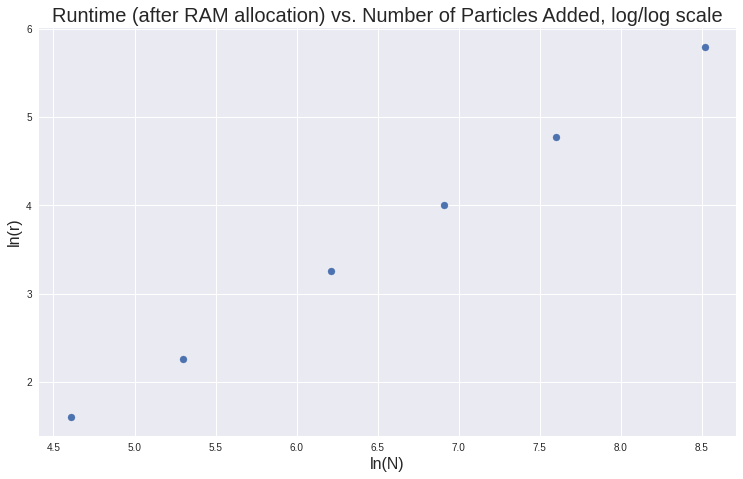

In [44]:
# Create figure
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = plt.subplot(111)

plt.title("Runtime (after RAM allocation) vs. Number of Particles Added, log/log scale", fontsize=20)
plt.xlabel("ln(N)", fontsize=16)
plt.ylabel("ln(r)", fontsize=16)

n_plot = np.log(n)
t_plot = np.log(t)

plt.scatter(n_plot, r_plot)

plt.show()